In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import os
from dotenv import load_dotenv


In [8]:
load_dotenv()
data_path = os.getenv('DATA_PATH')
df = pd.read_csv(data_path)

In [9]:
#visualize columns
print(df.columns)

Index(['Id', 'Phone', 'Bin Time Stamp', 'Latitude', 'Longitude',
       'Data Throughput-RLC DL Throughput (kbps)',
       'Serving Channel Info-DL EARFCN', 'Serving Cell Info-Serving PCI',
       'RSRP (d Bm)-Dominant RSRP (d Bm) ', 'Common-Protocol',
       'Serving RS Info-Serving RSRP (d Bm)',
       'Serving RS Info-Serving RS CINR (d B)',
       'Serving RS Info-Serving RSRQ (d B)',
       'Audio Quality.POLQA Downlink MOS-POLQA SWB',
       'LTE-Physical DSCH Throughput (kbps)',
       'Nemo Data Connection Attempt - HTTP', 'Nemo Data Connection Success',
       'Nemo Data Connection Disconnect', 'Nemo Data Connection Dropped',
       'Nemo Data Transfer Fail - HTTP',
       'PCell-Strongest Serving PCell Avg DL PRB', 'RSRP Legend',
       'Throughput Legend', 'RSRQ Legend', 'Cluster'],
      dtype='object')


In [4]:
# Check for missing values
print(df.isnull().sum())

Id                                              0
Phone                                           0
Bin Time Stamp                                  0
Latitude                                        0
Longitude                                       0
Data Throughput-RLC DL Throughput (kbps)      598
Serving Channel Info-DL EARFCN                576
Serving Cell Info-Serving PCI                 576
RSRP (d Bm)-Dominant RSRP (d Bm)              575
Common-Protocol                                 0
GSM Cell Identity-GSM Serving Cell Id       20092
Serving RS Info-Serving RSRP (d Bm)           576
Serving RS Info-Serving RS CINR (d B)         579
Serving RS Info-Serving RSRQ (d B)            577
POLQA Downlink MOS-POLQA SWB                17680
LTE-Serving PCI                               576
dtype: int64


In [5]:
# Get basic statistics
print(df.describe(include='all'))
print(df.info())

                  Id    Phone           Bin Time Stamp      Latitude  \
count   20096.000000  20096.0                    20096  20096.000000   
unique           NaN      NaN                    20096           NaN   
top              NaN      NaN  06/22/2024 11:26:58.000           NaN   
freq             NaN      NaN                        1           NaN   
mean    10048.500000      1.0                      NaN     21.438427   
std      5801.359841      0.0                      NaN      0.053696   
min         1.000000      1.0                      NaN     21.326471   
25%      5024.750000      1.0                      NaN     21.398846   
50%     10048.500000      1.0                      NaN     21.438604   
75%     15072.250000      1.0                      NaN     21.470140   
max     20096.000000      1.0                      NaN     21.601685   

           Longitude  Data Throughput-RLC DL Throughput (kbps)  \
count   20096.000000                              19498.000000   
uni

Network performance Kpis:

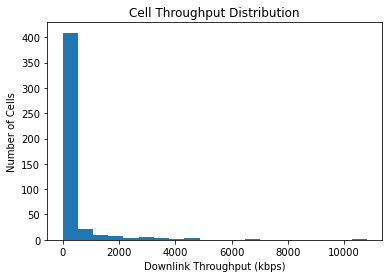

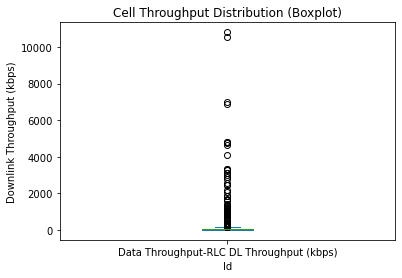

In [6]:
# Group data by cell ID and calculate average throughput
cell_throughput = df.groupby('Serving Cell Info-Serving PCI')['Data Throughput-RLC DL Throughput (kbps)'].mean()
# Histogram
cell_throughput.plot.hist(bins=20)  # Adjust the number of bins as needed
plt.xlabel('Downlink Throughput (kbps)')
plt.ylabel('Number of Cells')
plt.title('Cell Throughput Distribution')
plt.show()

# Boxplot
cell_throughput.plot(kind='box')
plt.xlabel('Id')
plt.ylabel('Downlink Throughput (kbps)')
plt.title('Cell Throughput Distribution (Boxplot)')
plt.show()


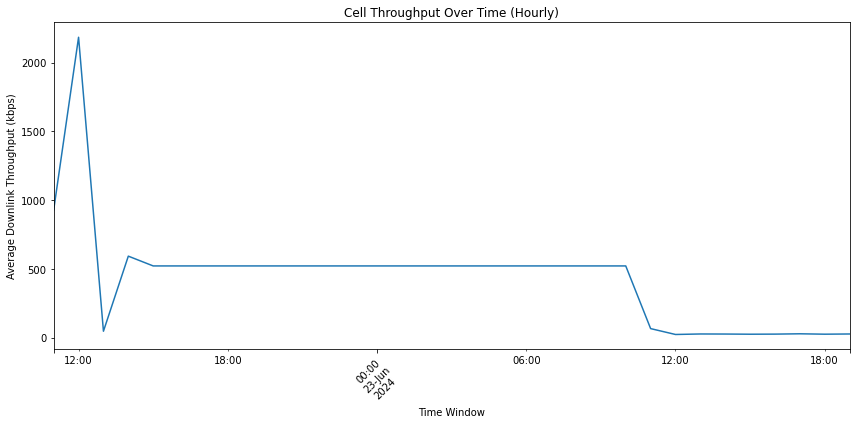

In [7]:
df["Time Window"] = pd.to_datetime(df["Bin Time Stamp"])

# Resample data by hour and calculate average throughput
hourly_throughput = df.resample("H", on="Time Window")["Data Throughput-RLC DL Throughput (kbps)"].mean()

# Handle potential missing data for specific hours
# (Optional, comment out if you don't expect missing data)
hourly_throughput = hourly_throughput.fillna(method='ffill')  # Forward fill missing values

# Plot the hourly throughput
plt.figure(figsize=(12, 6))  
hourly_throughput.plot(kind="line", style='-')
plt.xlabel("Time Window")
plt.ylabel("Average Downlink Throughput (kbps)")
plt.title("Cell Throughput Over Time (Hourly)")

# Ensure all hours are displayed on the x-axis
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

Signal strength distribution:

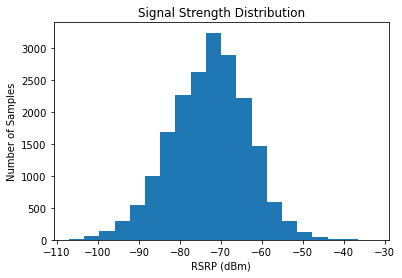

In [8]:
df["Serving RS Info-Serving RSRP (d Bm)"].plot.hist(bins=20)
plt.xlabel("RSRP (dBm)")
plt.ylabel("Number of Samples")
plt.title("Signal Strength Distribution")
plt.show()


Call quality kpis:

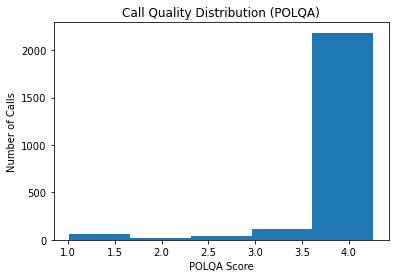

In [9]:
df["POLQA Downlink MOS-POLQA SWB"].plot.hist(bins=5)  # Adjust the number of bins as needed
plt.xlabel("POLQA Score")
plt.ylabel("Number of Calls")
plt.title("Call Quality Distribution (POLQA)")
plt.show()


Network Utilization KPIs:

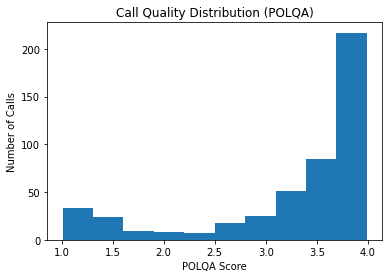

In [10]:
ndf = df[df["POLQA Downlink MOS-POLQA SWB"] < 4]["POLQA Downlink MOS-POLQA SWB"].plot.hist()
plt.xlabel("POLQA Score")
plt.ylabel("Number of Calls")
plt.title("Call Quality Distribution (POLQA)")
plt.show()



Machine Learning Section

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('Common-Protocol', axis=1)
X = df.drop('Time Window', axis=1)
X = df.drop("Bin Time Stamp", axis=1)
y = df['Common-Protocol']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Classification

Logistic Regression

KeyError: "None of [Index(['Technology', 'Band', 'Device Category', 'Lte Category', 'Dl Rfcn',\n       'Cellid', 'Lte Pci'],\n      dtype='object')] are in the [columns]"

Decesion tree


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")


ValueError: could not convert string to float: '06/23/2024 18:52:56.000'

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Regression

Linear regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
print(f"Linear Regression RMSE: {mean_squared_error(y_test, y_pred_lr, squared=False)}")


ValueError: could not convert string to float: 'LTE-A'

Decision Trees for Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Random Forest for Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


ValueError: could not convert string to float: 'LTE-A'

Clustering

K-Means clustering

In [41]:
from sklearn.cluster import KMeans

X = df[['Technology', 'Band', 'Device Category', 'Lte Category', 'Dl Rfcn', 'Cellid', 'Lte Pci']]
X = pd.get_dummies(X)  # Encode categorical variables
#X = X.dropna()
X = X.fillna(X.mean())  # Replace NaNs with the mean value of each column
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

print(df['Cluster'].value_counts())


1    35880
0    10423
2     3429
3     1752
4       12
Name: Cluster, dtype: int64


Hierarchical Clustering

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

X = df[['Technology', 'Band', 'Device Category', 'Lte Category', 'Dl Rfcn', 'Cellid', 'Lte Pci']]
X = pd.get_dummies(X)  # Encode categorical variables

Z = linkage(X, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()

df['Cluster'] = fcluster(Z, 5, criterion='maxclust')
print(df['Cluster'].value_counts())


ValueError: The condensed distance matrix must contain only finite values.

Anomaly Detection

Isolation Forest

In [43]:
from sklearn.ensemble import IsolationForest

X = df[['Signal Strength']].values  # Assume 'Signal Strength' is a continuous feature

model = IsolationForest(contamination=0.01)  # Adjust contamination rate as needed
df['Anomaly'] = model.fit_predict(X)

anomalies = df[df['Anomaly'] == -1]
print(anomalies)


KeyError: "None of [Index(['Signal Strength'], dtype='object')] are in the [columns]"

Local Outlier Factor (LOF)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

X = df[['Signal Strength']].values  # Assume 'Signal Strength' is a continuous feature

model = LocalOutlierFactor(n_neighbors=20, contamination=0.01)  # Adjust contamination rate and neighbors as needed
df['Anomaly'] = model.fit_predict(X)

anomalies = df[df['Anomaly'] == -1]
print(anomalies)


Dimensionality Reduction

Principal Component Analysis (PCA)

In [45]:
from sklearn.decomposition import PCA

X = df[['Technology', 'Band', 'Device Category', 'Lte Category', 'Dl Rfcn', 'Cellid', 'Lte Pci']]
X = pd.get_dummies(X)  # Encode categorical variables
X = X.dropna()

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(df_pca.head())


             PC1         PC2
0 -108466.899109  220.492058
1 -108466.898719  219.496604
2 -108466.898330  218.501151
3 -108637.899179  220.434195
4 -108637.898790  219.438742


Feature Engineering

In [ ]:
df['Tech_Band_Interaction'] = df['Technology'] + '_' + df['Band']
df['Signal Strength Bin'] = pd.cut(df['Signal Strength'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])


Time Series Analysis

ARIMA Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# Assume 'Signal Strength' is time series data
time_series = df.set_index('Timestamp')['Signal Strength']

model = ARIMA(time_series, order=(5, 1, 0))  # Example order, tune as needed
model_fit = model.fit(disp=0)
forecast = model_fit.forecast(steps=10)  # Forecast next 10 time points
